In [1]:
# importando bibliotecas
import logging
import os
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

# configurando o logging
logging.basicConfig(
    filename='./results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

In [2]:
# lendo csv
def read_data(file_path):
    """Read data from csv.
    Args:
        file_path (str): file path to read.
    Return:
        df_file (DataFrame): returns the file read as a dataframe.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError: # pylint: disable=bare-except
        logging.error("Error read_csv. We were not able to find %s", file_path)

In [3]:
pasta_dados = 'data/preco_gasolina_regioes/'

lista_arquivos = os.listdir(pasta_dados)
lista_arquivos

['preco_gasolina_regioes_2004-01.csv',
 'preco_gasolina_regioes_2004-02.csv',
 'preco_gasolina_regioes_2005-01.csv',
 'preco_gasolina_regioes_2005-02.csv',
 'preco_gasolina_regioes_2006-01.csv',
 'preco_gasolina_regioes_2006-02.csv',
 'preco_gasolina_regioes_2007-01.csv',
 'preco_gasolina_regioes_2007-02.csv',
 'preco_gasolina_regioes_2008-01.csv',
 'preco_gasolina_regioes_2008-02.csv',
 'preco_gasolina_regioes_2009-01.csv',
 'preco_gasolina_regioes_2009-02.csv',
 'preco_gasolina_regioes_2010-01.csv',
 'preco_gasolina_regioes_2010-02.csv',
 'preco_gasolina_regioes_2011-01.csv',
 'preco_gasolina_regioes_2011-02.csv',
 'preco_gasolina_regioes_2012-01.csv',
 'preco_gasolina_regioes_2012-02.csv',
 'preco_gasolina_regioes_2013-01.csv',
 'preco_gasolina_regioes_2013-02.csv',
 'preco_gasolina_regioes_2014-01.csv',
 'preco_gasolina_regioes_2014-02.csv',
 'preco_gasolina_regioes_2015-01.csv',
 'preco_gasolina_regioes_2015-02.csv',
 'preco_gasolina_regioes_2016-01.csv',
 'preco_gasolina_regioes_

In [4]:
gasolina_precos = pd.DataFrame({'Tempo': [], 'Preço Gasolina - Média': []})

In [5]:
for arquivo in lista_arquivos:
    df = read_data(pasta_dados + arquivo)
    media_total = df.loc[(len(df.index))-1, 'Valor de Venda - Media']
    ano = arquivo[23:27]
    
    if '-01' in arquivo: # primeiro semestre
        data = '01-06-' + ano
    else: # segundo semestre
        data = '01-12-' + ano
        
    gasolina_precos = gasolina_precos.append({'Tempo': data, 'Preço Gasolina - Média': media_total}, ignore_index = True)

In [6]:
gasolina_precos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tempo                   36 non-null     object 
 1   Preço Gasolina - Média  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [7]:
gasolina_precos['Tempo'] = pd.to_datetime(gasolina_precos['Tempo'], format='%d-%m-%Y')
gasolina_precos

,Tempo,Preço Gasolina - Média
0,2004-06-01,2.03
1,2004-12-01,2.18
2,2005-06-01,2.30
3,2005-12-01,2.43
4,2006-06-01,2.59
5,2006-12-01,2.59
6,2007-06-01,2.56
7,2007-12-01,2.53
8,2008-06-01,2.54
9,2008-12-01,2.55


In [8]:
atualizao_monetaria = read_data('data/tabela_atualizao_monetaria.csv')
atualizao_monetaria

,Meses,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Jan,21.280595,22.402504,24.517690,28.131595,31.052744,32.957268,34.620735,35.594754,37.429911,...,49.768770,52.537233,55.809388,62.102540,66.188858,67.556931,69.876800,73.008384,76.985382,84.807227
1,Fev,21.410406,22.575003,24.780029,28.826445,31.310481,33.145124,34.752293,35.769168,37.688177,...,50.226642,52.868217,56.635366,63.040288,66.466851,67.712311,70.128356,73.147099,77.193242,85.375435
2,Mar,21.421111,22.685620,24.856847,29.247311,31.432591,33.290962,34.832223,35.919398,37.869080,...,50.487820,53.206573,57.292336,63.639170,66.626371,67.834193,70.507049,73.271449,77.826226,86.229189
3,Abr,21.448958,22.794510,25.010959,29.647999,31.611756,33.533986,34.926270,36.077443,38.062212,...,50.790746,53.642866,58.157450,63.919182,66.839575,67.881676,71.049953,73.403337,78.495531,87.703708
4,Mai,21.468262,22.985983,25.181033,30.057141,31.741364,33.839145,34.968181,36.171244,38.305810,...,51.090411,54.061280,58.570367,64.328264,66.893046,68.024227,71.476252,73.234509,78.793814,NaN
5,Jun,21.457527,23.117003,25.203695,30.354706,31.868329,34.076019,35.013639,36.265289,38.673545,...,51.269227,54.385647,59.150213,64.958680,67.133860,68.316731,71.583466,73.051422,79.550234,NaN
6,Jul,21.521899,23.255705,25.357437,30.336493,32.027670,34.038535,34.989129,36.377711,39.025474,...,51.412780,54.527049,59.605669,65.263985,66.932458,69.293660,71.590624,73.270576,80.027535,NaN
7,Ago,21.821053,23.513843,25.649047,30.348627,32.261471,34.048746,35.027617,36.494119,39.251821,...,51.345943,54.597934,59.951381,65.681674,67.046243,69.466894,71.662214,73.592966,80.843815,NaN
8,Set,22.085087,23.699602,25.869628,30.403254,32.422778,34.048746,35.020611,36.709434,39.334249,...,51.428096,54.696210,60.101259,65.885287,67.026129,69.466894,71.748208,73.857900,81.555240,NaN
9,Out,22.180052,23.803880,26.084345,30.652560,32.477896,34.099819,35.076643,36.801207,39.393250,...,51.566951,54.964221,60.407775,65.937995,67.012723,69.675294,71.712333,74.500463,82.533902,NaN


In [9]:
gasolina_precos_atualizada = pd.DataFrame({'Tempo': [], 'Preço Gasolina - Média': []})

In [10]:
indice_abr_2022 = atualizao_monetaria['2022'][3]

for i in gasolina_precos.index:
    ano = gasolina_precos['Tempo'][i].year
    mes = gasolina_precos['Tempo'][i].month
    preco = gasolina_precos['Preço Gasolina - Média'][i]
    
    if mes == 6: # junho
        preco_atualizado = round(((preco/atualizao_monetaria[str(ano)][5]) * indice_abr_2022), 2) 
    else: # dezembro
        preco_atualizado = round(((preco/atualizao_monetaria[str(ano)][11]) * indice_abr_2022), 2)
    
    gasolina_precos_atualizada = gasolina_precos_atualizada.append({'Tempo': gasolina_precos['Tempo'][i], 'Preço Gasolina - Média': preco_atualizado}, ignore_index = True)

In [11]:
gasolina_precos_atualizada

,Tempo,Preço Gasolina - Média
0,2004-06-01,5.59
1,2004-12-01,5.85
2,2005-06-01,5.92
3,2005-12-01,6.18
4,2006-06-01,6.49
5,2006-12-01,6.42
6,2007-06-01,6.19
7,2007-12-01,5.99
8,2008-06-01,5.76
9,2008-12-01,5.63


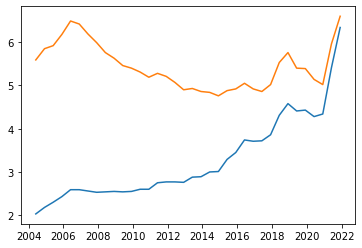

In [12]:
# analisando os graficos iniciais
plt.plot(gasolina_precos['Tempo'], gasolina_precos['Preço Gasolina - Média'])
plt.plot(gasolina_precos_atualizada['Tempo'], gasolina_precos_atualizada['Preço Gasolina - Média'])
plt.show()